# Scikit-Learn Example

Scikit-learn (or sklearn) makes the use of machine learning algorithms incredibly easy and user friendly. This is a good thing, but it can be a dangerous thing if you don't understand what's going on "under the hood." I encourage you to get at least a basic understand of each algorithm before employing it.  

In this example, I'm assuming you've already seen the "sklearn algorithms in three phases". This takes us through a slightly more realistic example.

## What does scikit-learn do?

Largely speaking, scikit-learn provides you with tools to do three things:  
1. **Supervised Learning** (which falls in two categories)  
    a. Classification: predicting what category something belongs to (e.g. redeemers vs non-redeemers)  
    b. Regression: predicting a specific number (e.g. dollars spent per trip)
2. **Unsupervised Learning** (e.g. clustering such as k-means, or dimensionality reduction as in PCA)
3. **Preprocessing** (e.g. standardizing variables; splitting into train and test sets)

We'll focus on supervised learning since that's most heavily used at 84.51.



## TL;DR

If you don't want to read all this stuff, here's the two second version:


In [98]:
#Import the modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#Read the CSV data
df = pd.read_csv('data.csv')
X = df[['x1', 'x2']]
y = df['target']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1234)

#Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Test on unseen data
prediction = clf.predict(X_test)
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, prediction))


Test Set Accuracy:  0.908


The above tl;dr code can be used on pretty much **any of scikit-learn's algorithms** whether something as simple as logistic regression or as complex as gradient boosted trees.  

But please read the detailed example below that unpacks some of this for us.

## A Supervised Learning Plan

Let's go over a simple supervised learning example. A typical plan might look something like this:

1. Import the learner from the relevant module
2. Split your data into training, cross-validation, and testing sets.
3. Repeatedly train the learner on the training data set and tune any hyper-parameters by checking the model performance on the cross-validation set.
4. Once you have selected a final model, make a prediction on the final test set to get an estimate of true model performance.

In this example we'll use a decision tree classifier.

## 1. Import the Learner

To make a decision tree, we'll need the `DecisionTreeClassifier` class which is in the `tree` submodule.  
We will also import pandas and numpy to store our data.

In [71]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

Now that we've imported our learner class, we "instantiate" that class. I.e. we can make a specific decision tree object that we'll train on our data.

In [72]:
clf = DecisionTreeClassifier()

## 2. Read the Data and split into train, cross-validation, and test sets

Let's read our data which is stored in CSV format using pandas.  
Then, let's split our data into training and testing sets using the convenience function train_test_split.

In [73]:
#read the CSV
data = pd.read_csv('data.csv')

#The predictors are simply called x1 and x2
X = data[['x1', 'x2']]

#The target variable is called "target"
y = data['target']

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 314)

#"random_state" is a random seed number. 
#This allows us to make the same random split every time for reproducibility.


It's always good practice to split into at least three groups.  
* A training set to fit your model's parameters
* A cross validation set to tune any hyper-parameters
* A test set that is ideally only used once at the very end to measure out-of-sample error.

With that in mind, let's use our train_test_split function again to further split our training data into train and cross-validation. Then let's plot the data to get a closer look.

           x1        x2
424  0.467684  1.497190
235 -1.565785  0.270728
231  2.159686 -0.274077
629  2.018496  0.600146
547  2.281142  0.247318


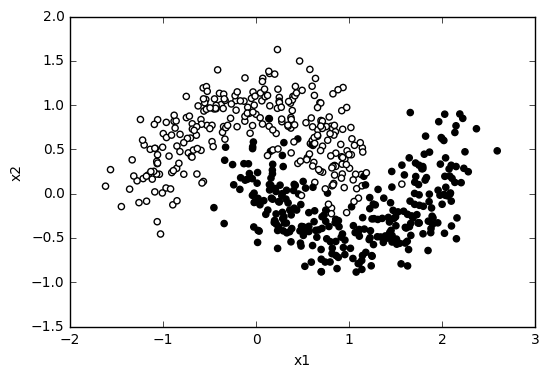

In [74]:
#Further split the training set into train and cross validation sets
X_train, X_crossval, y_train, y_cross_val = train_test_split(X_train, y_train, random_state = 314)


#Let's store our training data in a DataFrame and look at the first few rows using "head"
X_train = pd.DataFrame(X_train)
print(X_train.head())

#Then let's plot our data to get a closer look
#Don't worry too much about the plotting syntax for now.
X_train.plot('x1', 'x2', kind = 'scatter', c = y_train)
plt.show()

## 3. Training the Decision Tree

All of sciki-learn's algorithms use the exact same methods for simplicity's sake.  
The most important methods to remember are:
* fit(X, y)
* predict(X)

In [75]:
#Remember, we defined our decision tree earlier like so:
clf = DecisionTreeClassifier()


#To train any model, use the "fit" method.
#On a large dataset, this make take some time.
clf.fit(X_train, y_train)


#To make a prediction, use the "predict" method.
#Note this only needs the X data, not the y data.
pred = clf.predict(X_crossval)

#"pred" is now an array of 1s and 0s depending on whether the tree thinks
#it belongs in class 1 or class 0
print(pred)


[1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0
 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 1]


### Evaluating a Classifier

In order to know how well a classifier is performing, use scikit-learn's `metrics` module.  
For classification, one basic metric is the "accuracy" metric, which counts the percentage of times a model's prediction was correct.  

Nearly all of scikit-learn's metrics use the same interface for simplicity's sake. Usually they take the form:    
`metric_name(y_true, y_pred)`  

y_true is the actual y value in the cross validation set. y_pred is the predicted value that your model generated.

In [76]:
#import the metrics module
from sklearn import metrics

#Calculate the accuracy using "accuracy_score"
print(metrics.accuracy_score(y_cross_val, pred))

print("Over 90% accuracy, not bad!")


#Sometimes it's easier to think in terms of error. In this case it's just 1 - accuracy
print(1 - metrics.accuracy_score(y_cross_val, pred))

print("Error under 10%, not bad!")

0.925531914894
Over 90% accuracy, not bad!
0.0744680851064
Error under 10%, not bad!


### Tuning the hyper-parameters

We have over 90% accuracy in our cross-validation set, which is pretty solid. But can we do better? What if the model is over-fitting or under fitting? We need to train its hyper-parameters.  

One hyper parameter in decision trees is `max_leaf_nodes`. This sets the maximum number of leaf nodes a decision tree can have. Fewer leaf nodes implies a more rigid, restricted model and therefore less likely to overfit. More leaf nodes means a more flexible model that can fit complex shapes, but is more likely to overfit.  

To find the right balance of flexibility without overfitting, we will do the following:  
1. Train a number of different trees, with max_leaf_nodes ranging from very rigid to very flexible
2. Calculate the error in both the training data and the cross-validation data for each tree
3. Plot how the error rates of each change as the model gets more flexible

The training error should keep falling to zero. But the cross-validation error may fall at first, but it will likely start to climb back up after a while. Once the error starts to climb, you know the model is over-fitting.

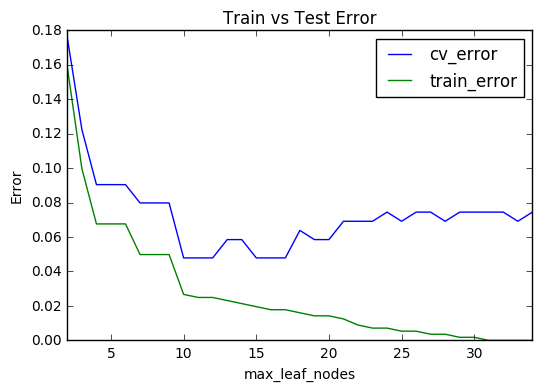

In [79]:
#Create a list of decision trees using a list comprehension (remember those?)
trees = [DecisionTreeClassifier(max_leaf_nodes = i) for i in range(2,35)]

#Loop over each tree and train it on the training data
for tree in trees:
    tree.fit(X_train, y_train)

#Create two empty lists that will score the train and cross-validation errors
train_error = []
cv_error = []

#Loop over each tree, calculate the train and cross-val error
#and store the results in their respective lists
for tree in trees:
    #Cross-val error
    pred = tree.predict(X_crossval)
    error = 1 - metrics.accuracy_score(y_cross_val, pred)
    cv_error.append(error)
    
    #train error
    pred = tree.predict(X_train)
    error = 1 - metrics.accuracy_score(y_train, pred)
    train_error.append(error)

#Create a DataFrame containing both train and cross validation errors
errors = pd.DataFrame({'cv_error': cv_error, 'train_error': train_error}, index = range(2,35))

#Plot how the error rates change as the model gets more flexible
#(Again, don't worry about plotting syntax for now)
ax = errors.plot(title = "Train vs Test Error")
ax.set_xlabel('max_leaf_nodes')
ax.set_ylabel("Error")
plt.show()

### Over-Fitting

Based on the plot above, we can see that the training error keeps falling to zero, but based on the cross-validation error it looks like the model starts to over-fit once the max_leaf_nodes reaches about 10 nodes. At this point, the model is really just cherry-picking small noisy quirks in the training set. It's not capturing the "real" trends we see in the data. As a result, the error rate on the cross-validation set actually rises.

In [84]:
#Find the best parameter in the "errors" DataFrame
#In this case, I'll use pandas' "argmin" function

best_index = errors['cv_error'].argmin()
print(best_index)

best_error = errors.loc[best_index, 'cv_error']
print(best_error)

10
0.0478723404255


## 4. Make the Final Prediction on the Test Set

It seems odd that we're trying all sorts of different values for max_leaf_nodes and then just picking the best one. How do we know that on a "real" data set in the future, the best value will also be 10? What if it's more like 8, or 12?  

In all likelihood, the best hyper-parameter on a "real" future dataset will not be 10. We won't know that information until after the fact. However, in the meantime we can at least test our model one more time on completely unseen dataset. The error rate we see will be a decent estimate of the error we'll see on an actual unseen data set.

In [92]:
# Extract the best tree from the list of trees
# (Since max_leaf_nodes started at 2, we know the 8th tree in the list has max_leaf_nodes = 10)
tree = trees[best_index - 2]

#Make a prediction on the test set
pred = tree.predict(X_test)

error = 1 - metrics.accuracy_score(y_test, pred)

print(error)

print("The test error is higher than the cross-validation error as we'd expect.")
print("But it's still lower than our initial error rates.")

print("Error before hyper-param tuning: ", 1 - metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Error after hyper-param tuning: ", 1 - metrics.accuracy_score(y_test, tree.predict(X_test)))

0.056
The test error is higher than the cross-validation error as we'd expect.
But it's still lower than our initial error rates.
Error before hyper-param tuning:  0.076
Error after hyper-param tuning:  0.056


## Other Things to Note

This example should give you a good basic overview of how to train a classifier in scikit-learn.  

We skipped several issues that commonly come up in modeling, many of which scikit-learn has tools to help you with.   

Examples include:  
* Standardizing data using sklearn's StandardScaler
* Encoding categorical variables using one-hot-encoding
* Feature selection/reduction using numerous techniques
* Dimensionality reduction using PCA

### Clustering

Clustering is something you can easily do with scikit-learn using the same API.  
That is, it also uses the `fit()` and `predict()` methods, except it identifies clusters.  

```
#K-means with 3 clusters
km = KMeans(n_clusters = 3)
#Run the algorithm and identify the three clustroids
km.fit(X_train)
#Identify which cluster each observation belongs to using "predict"
clusters = km.predict(X_test)
```
